### Classification with Multinomial Naive Bayes Algorithm

##### Build a spam filter using Python and the multinomial Naive Bayes algorithm. Check Spam or Ham? Email Classifier Using Python using MultinomialNB.

Import the required Libraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

Load the Dataest

In [3]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### Check for Null Values

In [8]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

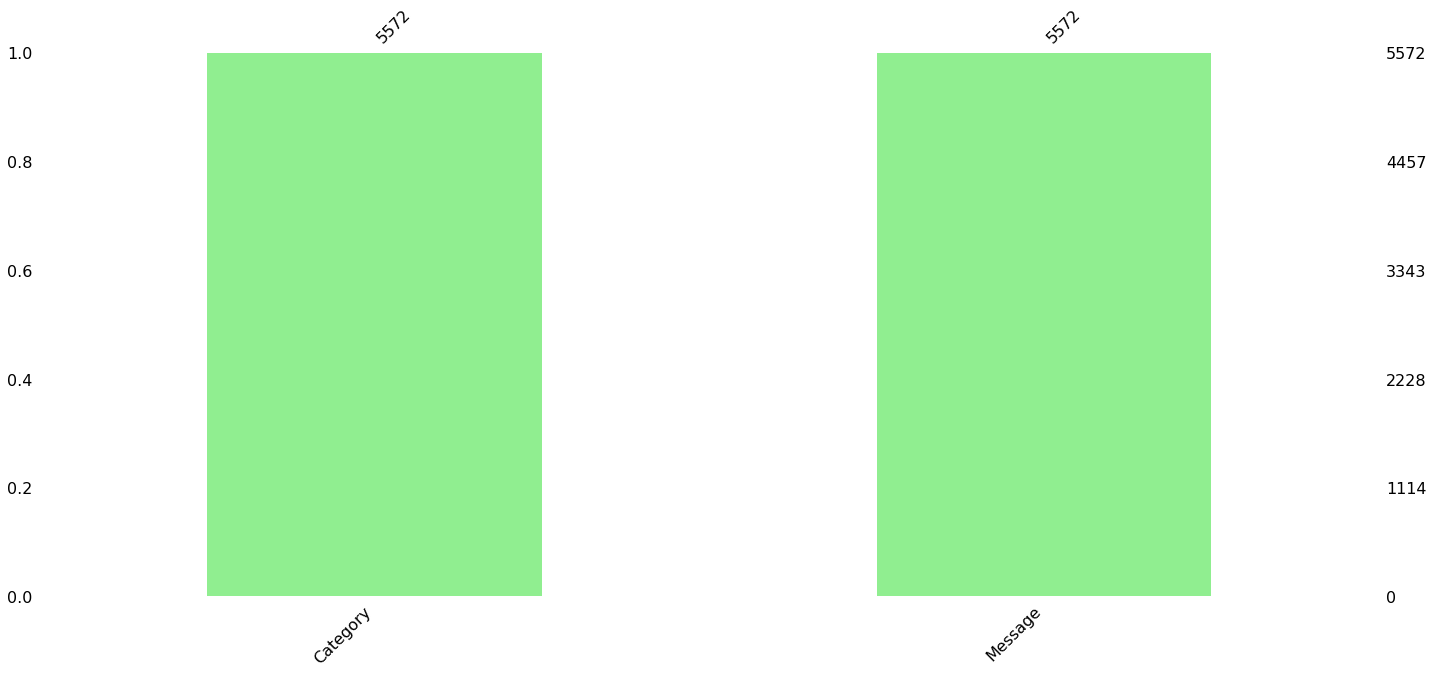

In [9]:
import missingno as msno
msno.bar(df,color = "lightgreen")
plt.show()

In [10]:
from texthero import preprocessing
import texthero as hero

In [11]:
custom_pipeline = [preprocessing.fillna,preprocessing.lowercase,preprocessing.remove_whitespace,preprocessing.remove_punctuation,preprocessing.remove_urls]
df["clean_message"] = df["Message"].pipe(hero.clean,custom_pipeline)

In [12]:
df.head()

,Category,Message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only i...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...


In [13]:
df["clean_message"] = hero.clean(df["clean_message"])
df.head()

,Category,Message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [14]:
df["Message_Length"] = df["Message"].apply(len)
df.head()

,Category,Message,clean_message,Message_Length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,111
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...,155
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,61


### Data Visualization

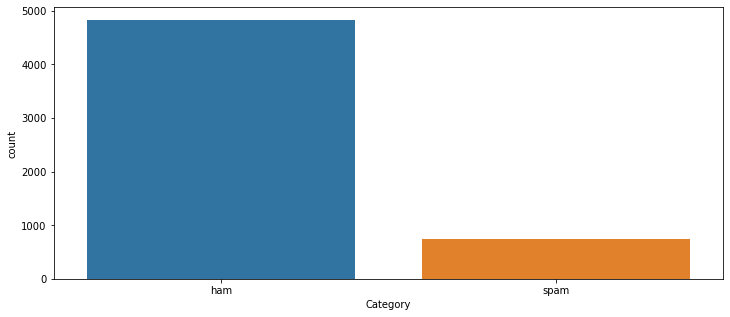

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(df["Category"])
plt.show()

### Data Preprocessing

In [16]:
dummies = pd.get_dummies(df["Category"])
dummies

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [17]:
df = pd.concat([df,dummies],axis = 1)
df.head()

,Category,Message,clean_message,Message_Length,ham,spam
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,111,1,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,29,1,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...,155,0,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,49,1,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,61,1,0


In [18]:
df = df.drop('ham',axis = 1)
df.head()

,Category,Message,clean_message,Message_Length,spam
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,111,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...,155,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,61,0


In [19]:
df = df.drop("Category",axis = 1)
df.head()

,Message,clean_message,Message_Length,spam
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,111,0
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni,29,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...,155,1
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say,49,0
4,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,61,0


In [20]:
X = df.drop(["Message","Message_Length","spam"],axis = 1)
Y = df["spam"]

In [21]:
X.head()

,clean_message
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry wkly comp win fa cup final tkts 21s...
3,u dun say early hor u c already say
4,nah think goes usf lives around though


In [22]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: spam, dtype: uint8

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
messages_bow = count_vector.fit_transform(df['clean_message'])

In [24]:
messages_bow.shape

(5572, 8014)

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer()
X_train_tfidf=tfidf_transformer.fit_transform(messages_bow)
X_train_tfidf.shape

(5572, 8014)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, df['spam'], test_size = 0.20, random_state = 0)

In [27]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [28]:
y_pred = classifier.predict(X_test)

print("Predicted:",y_pred)
print("Actual Values:",y_test.values)

Predicted: [0 0 0 ... 0 0 0]
Actual Values: [0 1 0 ... 0 1 0]


In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [30]:
acc = accuracy_score(y_test,y_pred)
print('Accuracy: ', accuracy_score(y_test,y_pred))

Accuracy:  0.9695067264573991


In [31]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[955   0]
 [ 34 126]]


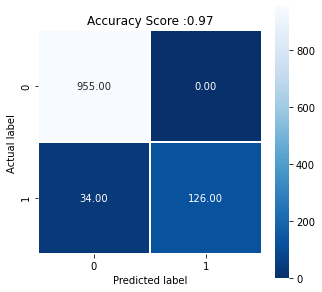

In [32]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
A=f'Accuracy Score :{acc:.2f}'
plt.title(A)
plt.show()